In [1]:
# imoporting modules
import pandas as pd      # its used for dataframe
import numpy as np      # its used for n dimensional array
import matplotlib.pyplot as plt     # its used for ploting the graph


ModuleNotFoundError: No module named 'matplotlib'

In [68]:
#read csv file
data=pd.read_csv("spam.csv",encoding="latin_1")
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [69]:
#find no.of rows and columns
data.shape

(5573, 5)

In [70]:
#find if any NaN numbers is there in data
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5523
Unnamed: 3    5561
Unnamed: 4    5567
dtype: int64

In [71]:
#Drop columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [72]:
#column names rechange
data = data.rename(columns={"v1":"label", "v2":"text"})

In [73]:
#Count observations in each label
data.label.value_counts()

ham     4826
spam     747
Name: label, dtype: int64

In [74]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [75]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [76]:
data['length'] = data['text'].apply(len)
data.head()

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [77]:
x=np.array(data['text'])
x
data.shape

(5573, 4)

In [78]:
y = np.array(data['label_num'])
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

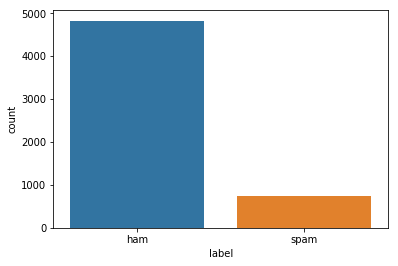

In [79]:
import seaborn as sns
sns.countplot(data["label"])
plt.show()

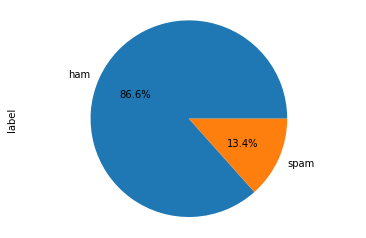

In [80]:
data["label"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()


In [81]:
spam1=data.loc[data['label']=='spam']
spam1["text"].head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: text, dtype: object

In [82]:
ham1=data.loc[data['label']=='ham']
ham1["text"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: text, dtype: object

In [83]:
x_train=np.array(data.iloc[0:500,1])
x_train.shape

(500,)

In [84]:
y_train=np.array(data.iloc[0:500,0])
y_train[0:5]

array(['ham', 'ham', 'spam', 'ham', 'ham'], dtype=object)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [88]:
train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)

In [89]:
from sklearn.naive_bayes import MultinomialNB


In [90]:
model=MultinomialNB()
model.fit(train_data,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
pred=model.predict(test_data)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
model.score(test_data,y_test)

0.98385167464114831

In [93]:
from sklearn.metrics import classification_report
nbreport=classification_report(y_test, pred)
print(nbreport)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1450
          1       0.95      0.92      0.94       222

avg / total       0.98      0.98      0.98      1672



In [94]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [95]:
y=[f1_score(y_test,pred),recall_score(y_test,pred),precision_score(y_test,pred)]

In [96]:
x=["f1score","recall","precision"]
y=[f1_score(y_test,pred),recall_score(y_test,pred),precision_score(y_test,pred)]
df = pd.DataFrame(dict(x=x, y=y))
df

,x,y
0,f1score,0.938215
1,recall,0.923423
2,precision,0.953488


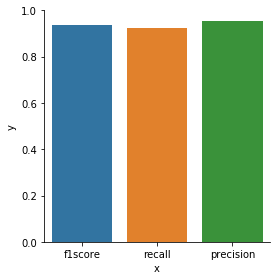

In [97]:
sns.factorplot("x","y", data=df,kind="bar")
plt.show()

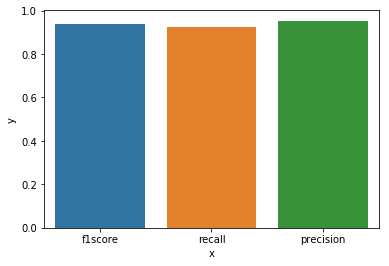

In [98]:
sns.barplot("x","y", data=df)
plt.show()

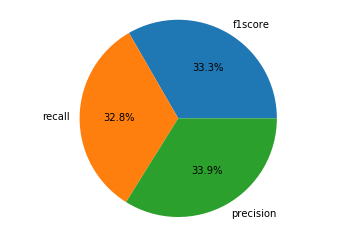

In [99]:
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.axis("equal")
plt.show()

In [136]:
#creating testing data
x_test=[ "hi how are you",
        "Free entry in 2 a wkly comp to win FA Cup fina...",
        "when will you go to home",
        "i will call you back",
        "are you busy now"]
                 
                

In [137]:
x_test.append("goodmoring")
x_test.append("WINNER!! As a valued network customer you have...")

In [138]:
x_test

['hi how are you',
 'Free entry in 2 a wkly comp to win FA Cup fina...',
 'when will you go to home',
 'i will call you back',
 'are you busy now',
 'goodmoring',
 'WINNER!! As a valued network customer you have...']

In [139]:
x_test1=np.array(x_test)
x_test1

array(['hi how are you',
       'Free entry in 2 a wkly comp to win FA Cup fina...',
       'when will you go to home', 'i will call you back',
       'are you busy now', 'goodmoring',
       'WINNER!! As a valued network customer you have...'],
      dtype='<U49')

In [140]:
X_train=data.iloc[0:200,1]
X_train[0:6]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
Name: text, dtype: object

In [141]:
Y_train=data.iloc[0:200,0]
Y_train[0:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [143]:
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(x_test1)

In [144]:
train_data.shape

(200, 1159)

In [145]:
test_data.shape

(7, 1159)

In [146]:
Y_train.shape

(200,)

In [147]:
from sklearn.naive_bayes import MultinomialNB


In [148]:
model=MultinomialNB()
model.fit(train_data,Y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [149]:
pred=model.predict(test_data)
pred

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam'],
      dtype='<U4')

In [150]:
y1=model.predict(test_data)               

In [151]:
y1

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam'],
      dtype='<U4')

In [152]:
df = pd.DataFrame(dict(INPUT=x_test1, OUTPUT=y1))
df

,INPUT,OUTPUT
0,hi how are you,ham
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam
2,when will you go to home,ham
3,i will call you back,ham
4,are you busy now,ham
5,goodmoring,ham
6,WINNER!! As a valued network customer you have...,spam


In [153]:
df.iloc[4:]

,INPUT,OUTPUT
4,are you busy now,ham
5,goodmoring,ham
6,WINNER!! As a valued network customer you have...,spam
